In [1]:
%load_ext autoreload
%autoreload 2
%cd ~/dev/neurad-studio

/home/gasparyanartur/dev/neurad-studio


In [2]:
from nerfstudio.generative.dynamic_dataset import DynamicDataset, NeuRADInfoGetter, RGBDataGetter
from nerfstudio.generative.utils import show_img
from pathlib import Path


dataset = DynamicDataset.from_config({
    "dataset": "neurad",
    "path": "data/neurad_outputs/",
    "data_getters": {
        "rgb": {
            "camera": "front_left_camera",
            "split": "test",
        },

        "gt-rgb": {
            "data_type": "rgb",
            "camera": "front_left_camera",
            "split": "test"
        },

        "meta": {}
    },
    "data_tree": {
        "neurad_outputs": {
            "001": "::10"
        }
    }
})

pred = dataset[3]["rgb"]
gt = dataset[3]["gt-rgb"]
print(dataset[3]["meta"])
show_img((pred, gt))

FileNotFoundError: [Errno 2] No such file or directory: 'data/neurad_outputs'

{'dataset': 'neurad_outputs', 'scene': '001', 'sample': '00'}


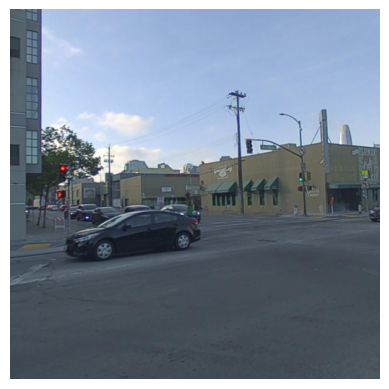

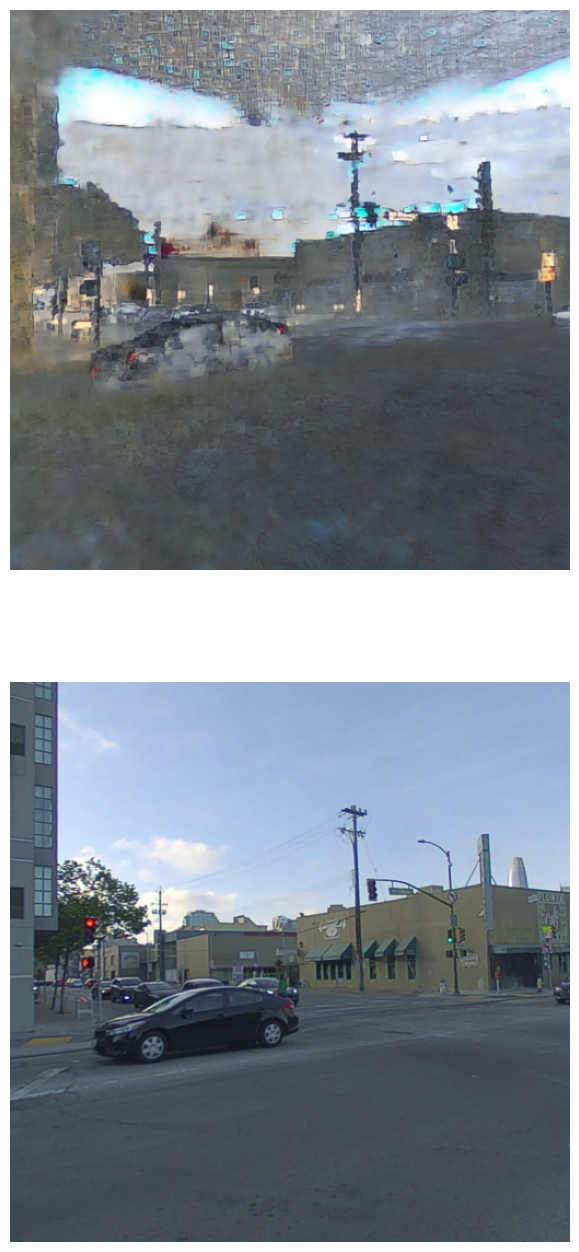

In [7]:


dataset = DynamicDataset.from_config({
    "dataset": "pandaset",
    "path": "data/pandaset/",
    "data_getters": {
        "rgb": {
            "camera": "front_left_camera",
        },

        "ref-rgb": {
            "camera": "front_left_camera",
        },

        "meta": {},
        "cn_ray_6_front_left_camera": {}
    },
    "data_tree": {
        "neurad_outputs": {
            "001": "::"
        }
    }
})

import torchvision.transforms.v2 as tvtf
batch = dataset[0]
pred = tvtf.Compose((tvtf.CenterCrop((1024, 1024)), tvtf.Resize((512, 512), antialias=True)))(batch["rgb"])
ref_rgb = batch["ref-rgb"]["rgb"]
ref_gt = batch["ref-rgb"]["gt"]
print(batch["meta"])
show_img((pred))
show_img((ref_rgb, ref_gt))

In [ ]:
data/reference_neurad/001/front_left_camera/0m/train/rgb/00.jpg
data/reference_neurad/001/front_left_camera/0m/train/rgb/15.jpg